# 02 — Features + Target (20 jours)

On construit des **features stationnaires** et la cible à 20 jours.

Points clés:
- features à t utilisent uniquement le passé
- la cible utilise `Close(t+20)` (shift négatif)


In [1]:
import sys
from pathlib import Path

ROOT = Path("..").resolve()
SRC = ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))

import numpy as np
import pandas as pd

from utils import get_logger
logger = get_logger("notebook", log_file=str(ROOT/"logs"/"run.log"))

from data import load_ohlc_from_xlsx
from features import build_features
from labels import add_target_20d_score

XLSX = str(ROOT / "dataset_train.xlsx")
df = load_ohlc_from_xlsx(XLSX, sheet_name="Gold")

df_feat = build_features(df)
df_feat = add_target_20d_score(df_feat, horizon=20)

logger.info("Before dropna: %s", df_feat.shape)
df_ml = df_feat.dropna().reset_index(drop=True)
logger.info("After dropna:  %s", df_ml.shape)

df_ml.tail()


2025-12-15 16:04:02,043 | INFO | data | Loading sheet=Gold from C:\Users\fayca\Downloads\hackathon_gold_project\hackathon_gold_project\dataset_train.xlsx
2025-12-15 16:04:05,632 | INFO | data | Loaded 11340 rows, columns=['Date', 'Open', 'High', 'Low', 'Close', 'smavg_50', 'smavg_100', 'smavg_240']
2025-12-15 16:04:05,634 | INFO | features | Building features...
2025-12-15 16:04:05,683 | INFO | features | Features built. Total columns=34
2025-12-15 16:04:05,694 | INFO | notebook | Before dropna: (11340, 35)
2025-12-15 16:04:05,711 | INFO | notebook | After dropna:  (11081, 35)


,Date,Open,High,Low,Close,smavg_50,smavg_100,smavg_240,log_ret_1,log_ret_lag_1,...,mom_60,close_to_smavg_50,close_to_smavg_100,close_to_smavg_240,rsi_14,bollinger_pctb_20,atr_rel_14,hl_range_rel,oc_change_rel,fut_ret_20
11076,2018-11-27,1222.40,1225.31,1212.03,1215.05,1214.57,1211.76,1271.42,-0.006031,-0.000532,...,0.019555,0.000395,0.002715,-0.044336,0.421644,0.355644,0.008421,0.010930,-0.006013,0.044023
11077,2018-11-28,1215.05,1226.75,1211.27,1221.23,1214.92,1211.55,1271.16,0.005073,-0.006031,...,0.020266,0.005194,0.007990,-0.039279,0.481940,0.509299,0.008875,0.012676,0.005086,0.037593
11078,2018-11-29,1221.25,1229.01,1220.50,1224.21,1215.26,1211.32,1270.90,0.002437,0.005073,...,0.019991,0.007365,0.010641,-0.036738,0.611451,0.605253,0.008296,0.006951,0.002424,0.042068
11079,2018-11-30,1224.24,1225.63,1216.77,1220.52,1215.67,1211.08,1270.59,-0.003019,0.002437,...,0.019517,0.003990,0.007795,-0.039407,0.668676,0.521149,0.008182,0.007259,-0.003039,0.049315
11080,2018-12-03,1221.70,1234.99,1221.52,1230.67,1216.30,1210.98,1270.29,0.008282,-0.003019,...,0.028676,0.011815,0.016260,-0.031190,0.709056,0.822471,0.008436,0.010945,0.007342,0.042107


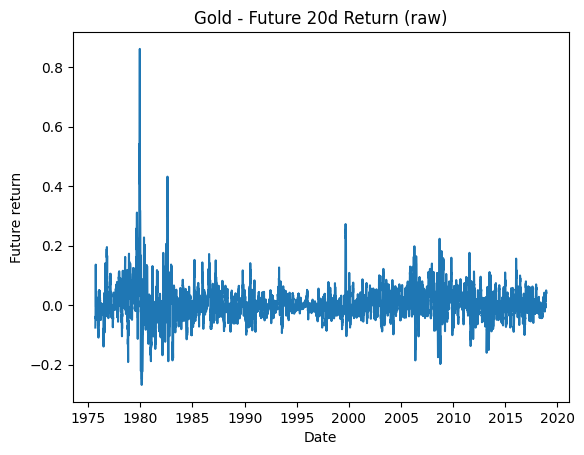

In [2]:

import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_ml["Date"], df_ml["fut_ret_20"])
plt.title("Gold - Future 20d Return (raw)")
plt.xlabel("Date")
plt.ylabel("Future return")
plt.show()


✅ La prochaine étape (notebook 03) : calibrer un **score ∈ [-1,1]** sur le train uniquement, puis entraîner des baselines.